In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
co2 = pd.read_csv("/content/Carbon_(CO2)_Emissions_by_Country.csv")

co2.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [3]:
# Data Cleaning
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [4]:
#Exploratory Data Analysis
# First, convert Date column values to pandas datetime objects
co2['Date'] = pd.to_datetime(co2['Date'], errors='coerce')

# Assign new Year column with year values from Date column
co2['Year'] = co2['Date'].dt.year

<Axes: title={'center': 'Global CO2 Emissions Over Time'}, xlabel='Year'>

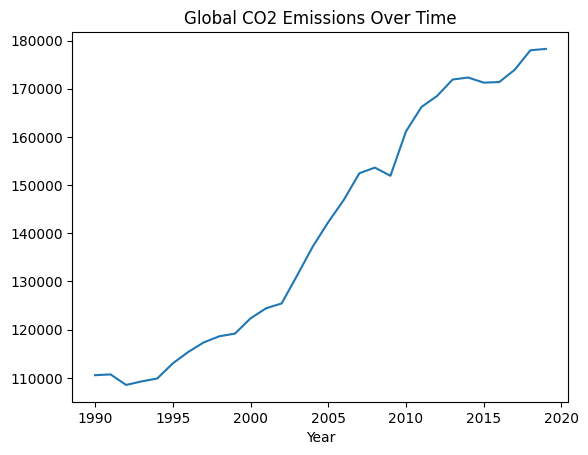

In [5]:
#Summary of global emissions by year
# Plot global average emissions by year
global_trends = co2.groupby(co2['Year'])['Kilotons of Co2'].mean()
global_trends.plot(kind="line", title="Global CO2 Emissions Over Time")

<Axes: title={'center': 'Global Per Capita CO2 Emissions'}, xlabel='Year'>

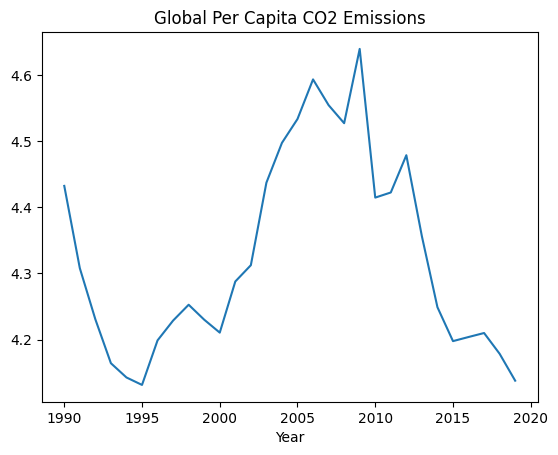

In [6]:
# Plot global average emissions per capita by year
per_capita_trends = co2.groupby(co2['Year'])['Metric Tons Per Capita'].mean()
per_capita_trends.plot(kind='line', title='Global Per Capita CO2 Emissions')

<Axes: title={'center': 'Average CO2 Emissions by Region'}, xlabel='Region'>

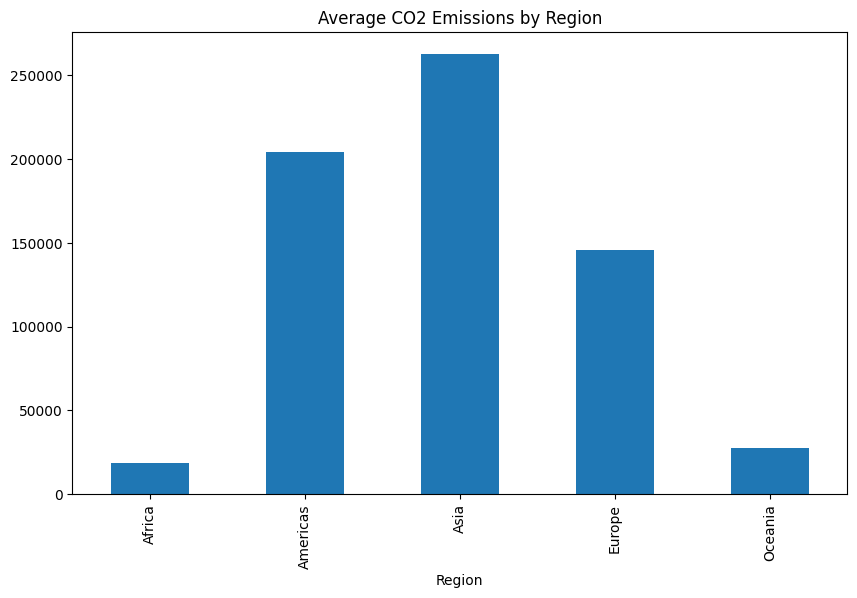

In [7]:
#Summary of CO2 emissions by region
# Plot global average emissions by region
regional_trends = co2.groupby('Region')['Kilotons of Co2'].mean()
regional_trends.plot(kind='bar', figsize=(10, 6), title='Average CO2 Emissions by Region')


<Axes: title={'center': 'Average CO2 Emissions Per Capita by Region'}, xlabel='Region'>

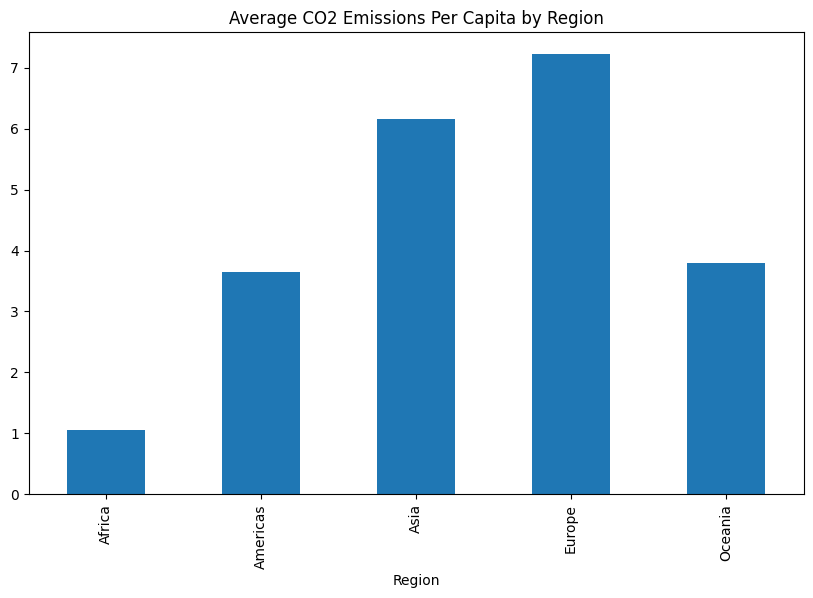

In [8]:
# Plot global average emissions by region
regional_trends = co2.groupby('Region')['Metric Tons Per Capita'].mean()
regional_trends.plot(kind='bar', figsize=(10, 6), title='Average CO2 Emissions Per Capita by Region')

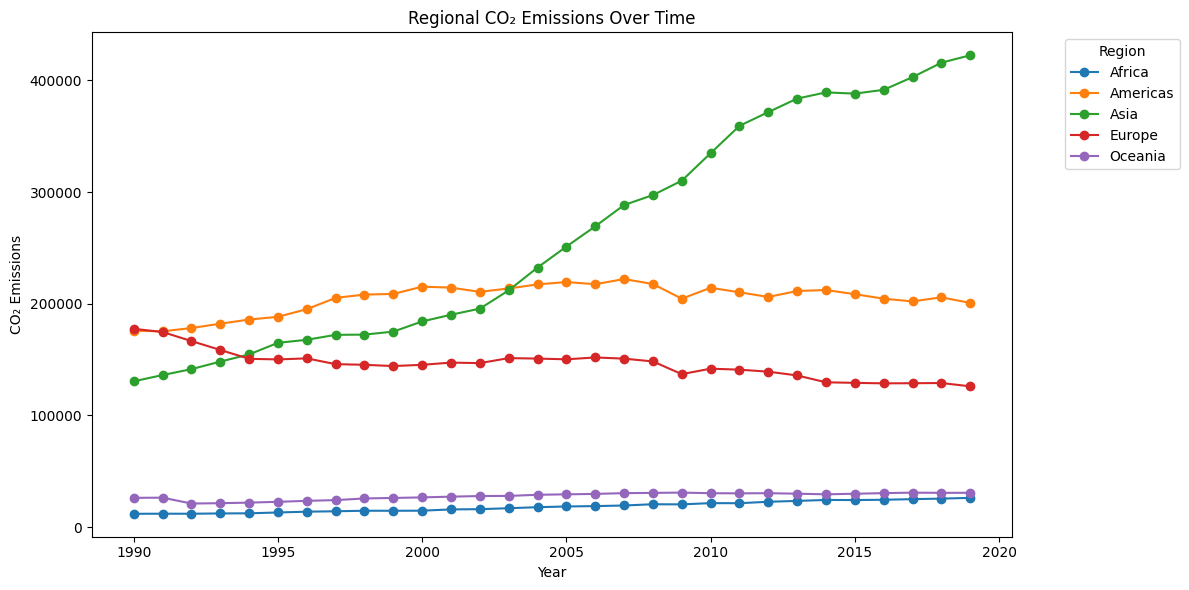

In [9]:
# Plot regional CO2 emissions over time
regional_trends = co2.groupby(['Year', 'Region'])['Kilotons of Co2'].mean().unstack()
regional_trends.plot(kind='line', figsize=(12, 6), marker='o')

plt.title('Regional CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

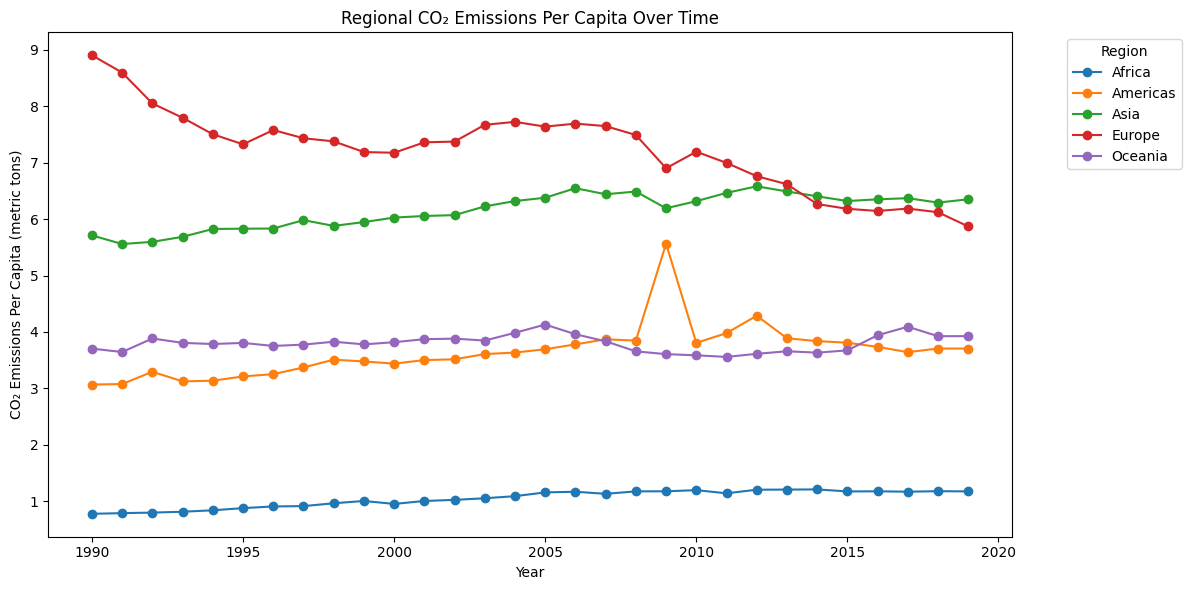

In [10]:
# Plot regional CO2 emissions per capita over time
regional_trends = co2.groupby(['Year', 'Region'])['Metric Tons Per Capita'].mean().unstack()
regional_trends.plot(kind='line', figsize=(12, 6), marker='o')

plt.title('Regional CO₂ Emissions Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions Per Capita (metric tons)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-11-1fa813f6be0d>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds_r')
<ipython-input-11-1fa813f6be0d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette='Greens_r')


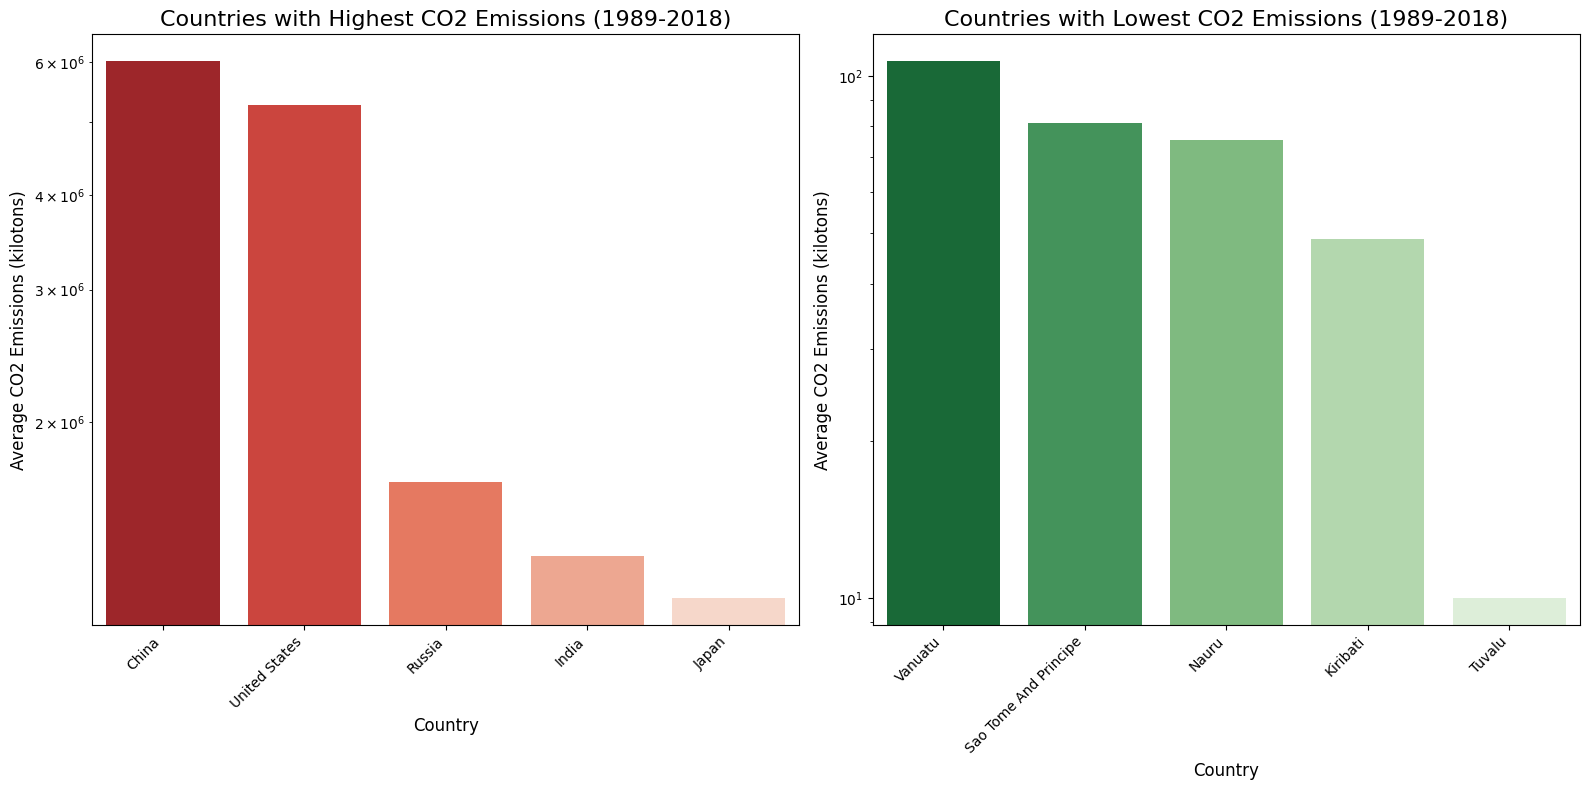

In [11]:
#Countries with the highest and lowest CO2 emissions (1989-2018 average)
# Sort countries by their average CO2 emissions
sorted_avg_emissions = co2.groupby('Country')['Kilotons of Co2'].mean().sort_values()

# Combine top 5 and bottom 5 countries for visualization
top_countries = sorted_avg_emissions.tail(5).sort_values(ascending=False)
bottom_countries = sorted_avg_emissions.head(5).sort_values(ascending=False)

# Create two separate plots for top 5 and bottom 5 countries
plt.figure(figsize=(16, 8))
# Plot top 5 countries
plt.subplot(1, 2, 1)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds_r')
plt.title('Countries with Highest CO2 Emissions (1989-2018)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (kilotons)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log') # Apply log scale to y-axis for better comparison visibility

# Plot bottom 5 countries
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette='Greens_r')
plt.title('Countries with Lowest CO2 Emissions (1989-2018)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (kilotons)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')

plt.tight_layout()
plt.show()

<ipython-input-12-cb57ab8b0a59>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds_r')
<ipython-input-12-cb57ab8b0a59>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette='Greens_r')


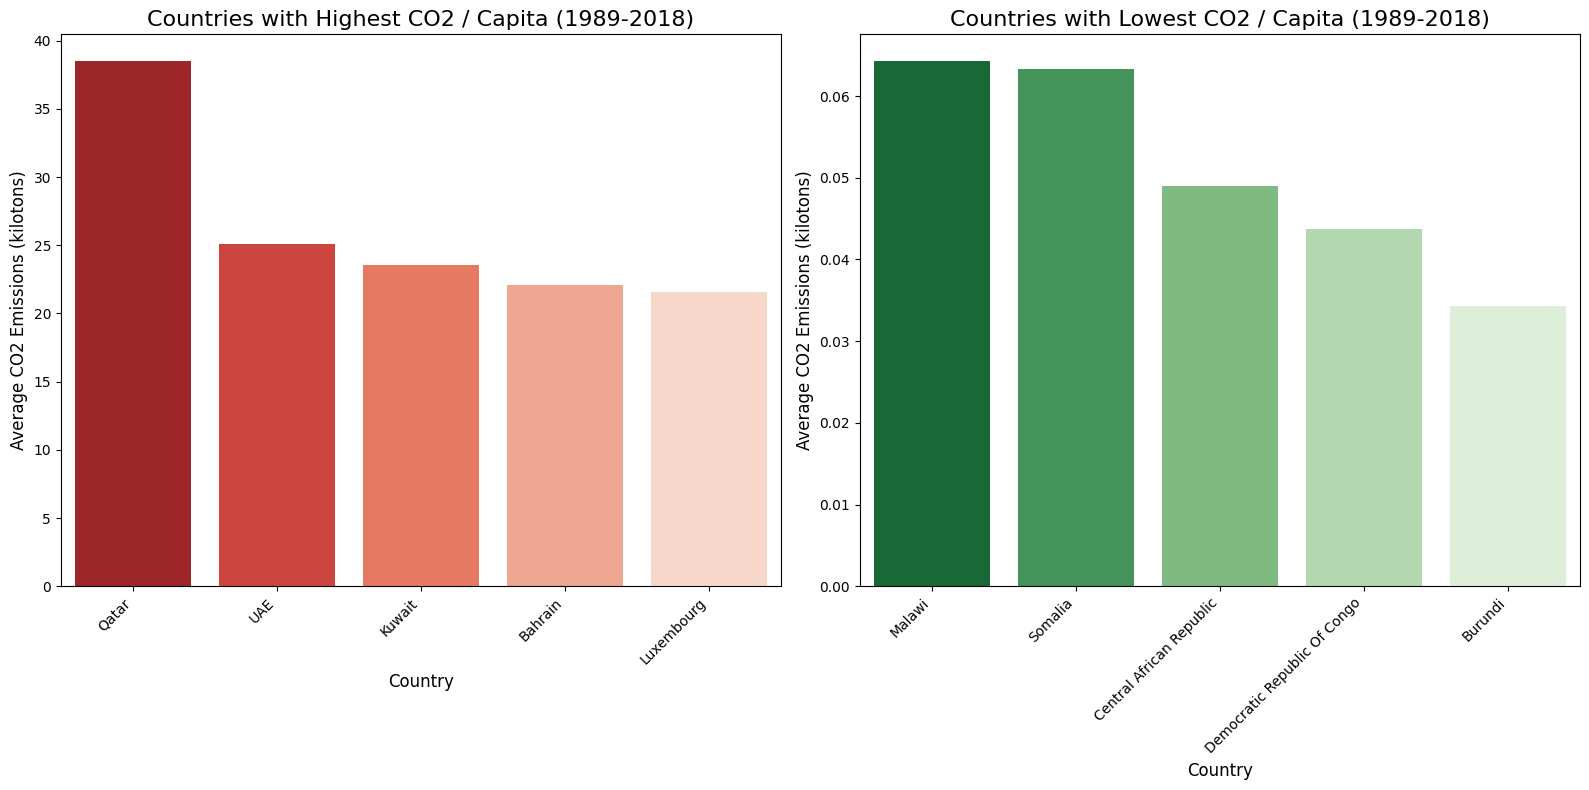

In [12]:
#Countries with highest and lowest CO2 per capita emissions (1989-2018 average)
# Sort countries by their average CO2 emissions
sorted_avg_emissions = co2.groupby('Country')['Metric Tons Per Capita'].mean().sort_values()

# Combine top 5 and bottom 5 countries for visualization
top_countries = sorted_avg_emissions.tail(5).sort_values(ascending=False)
bottom_countries = sorted_avg_emissions.head(5).sort_values(ascending=False)

# Create two separate plots for top 5 and bottom 5 countries
plt.figure(figsize=(16, 8))

# Plot top 5 countries
plt.subplot(1, 2, 1)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Reds_r')
plt.title('Countries with Highest CO2 / Capita (1989-2018)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (kilotons)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Plot bottom 5 countries
plt.subplot(1, 2, 2)
sns.barplot(x=bottom_countries.index, y=bottom_countries.values, palette='Greens_r')
plt.title('Countries with Lowest CO2 / Capita (1989-2018)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average CO2 Emissions (kilotons)', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**GDP**

In [13]:
# Read GDP dataset
gdp = pd.read_csv('/content/GDP.csv')

gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


In [14]:
# Create new column for average gdp (1990-2018) in gdp df
gdp['avg_gdp'] = gdp.loc[:, '1990':'2016'].mean(axis=1)

In [15]:
# Filter co2 dataset for the same years (1990-2018)
co2 = co2[(co2['Year'] >= 1990) & (co2['Year'] <= 2018)]

# Calculate the average CO2 emissions for each country into pivot table
avg_co2 = co2.groupby('Country', as_index=False)['Metric Tons Per Capita'].mean()
avg_co2.rename(columns={'Metric Tons Per Capita': 'avg_co2'}, inplace=True)

avg_co2.head()

,Country,avg_co2
0,Afghanistan,0.123103
1,Albania,1.235517
2,Algeria,3.008276
3,Andorra,7.072759
4,Angola,0.902069


In [16]:
# Remove trailing spaces in gdp dataset columns
gdp.columns = gdp.columns.str.strip()

# Merge avg_gdp from gdp dataset to co2 pivot table
gdp_co2_merged = pd.merge(avg_co2, gdp[['Country', 'avg_gdp']], on='Country', how='inner')

gdp_co2_merged.head()

,Country,avg_co2,avg_gdp
0,Afghanistan,0.123103,1406.679237
1,Albania,1.235517,5970.128558
2,Algeria,3.008276,10048.818630
3,Angola,0.902069,4453.997107
4,Argentina,3.724138,14050.205063


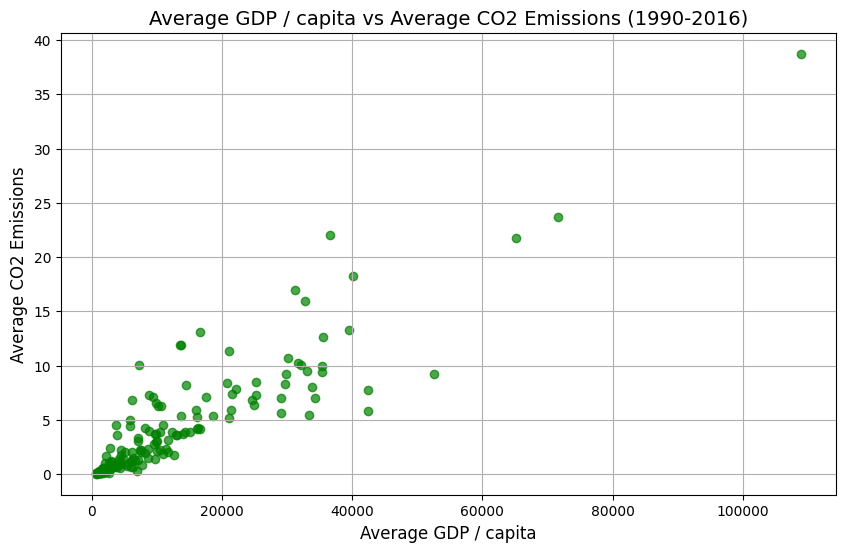

In [17]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_co2_merged['avg_gdp'], gdp_co2_merged['avg_co2'], alpha=0.7, color='green')

# Adding labels and title
plt.title('Average GDP / capita vs Average CO2 Emissions (1990-2016)', fontsize=14)
plt.xlabel('Average GDP / capita', fontsize=12)
plt.ylabel('Average CO2 Emissions', fontsize=12)
plt.grid(True)
plt.show()

Comparing CO2 emissions against population **size**

In [18]:
# Read population dataset
pop = pd.read_csv('/content/WorldPopulation.csv')

pop.head()

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281,NaN


In [19]:
# Create new column for average population (1990-2018)
pop['avg_pop'] = pop.loc[:, '1990':'2016'].mean(axis=1)

# Merge average population column into gdp_co2_merged dataset
gdp_co2_pop_merged = gdp_co2_merged.merge(
    pop[['Country', 'avg_pop']],
    on='Country',
    how='inner'
)

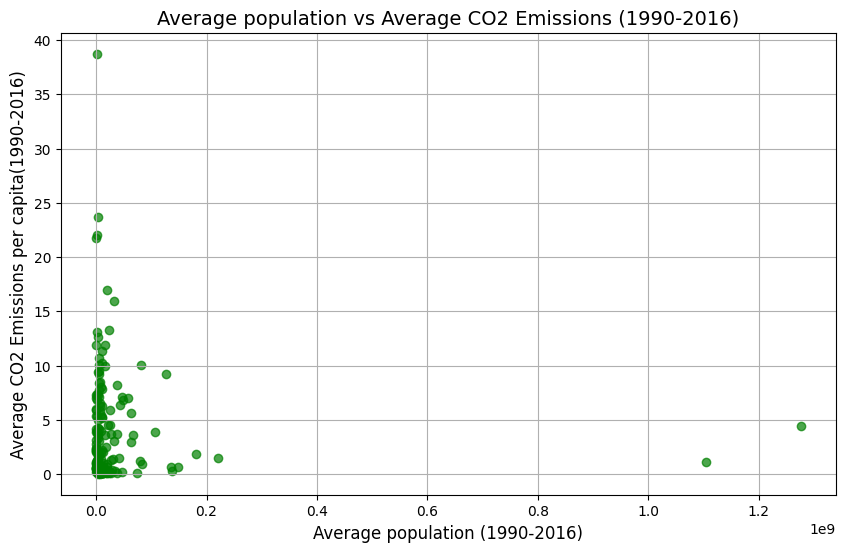

In [20]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(gdp_co2_pop_merged['avg_pop'], gdp_co2_pop_merged['avg_co2'], alpha=0.7, color='green')

# Adding labels and title
plt.title('Average population vs Average CO2 Emissions (1990-2016)', fontsize=14)
plt.xlabel('Average population (1990-2016)', fontsize=12)
plt.ylabel('Average CO2 Emissions per capita(1990-2016)', fontsize=12)
plt.grid(True)
plt.show()

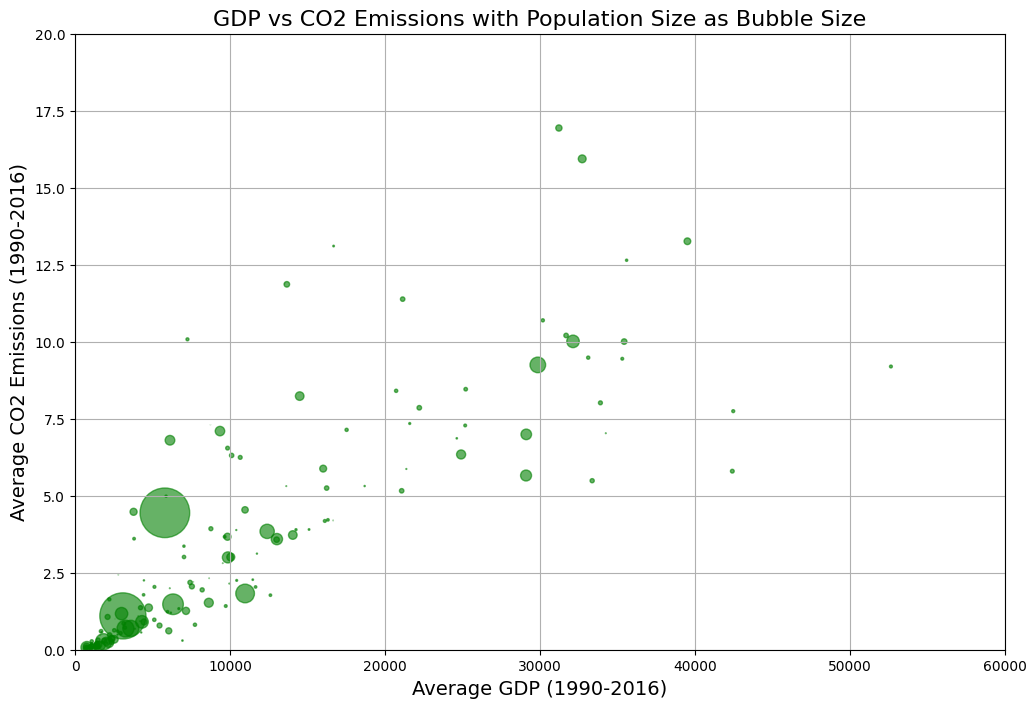

In [21]:
# Bubble Plot
plt.figure(figsize=(12, 8))

# Define bubble size by scaling population for visibility
bubble_size = gdp_co2_pop_merged['avg_pop'] / 1e6

plt.xlim(0, 60000)
plt.ylim(0, 20)

plt.scatter(
    gdp_co2_pop_merged['avg_gdp'],
    gdp_co2_pop_merged['avg_co2'],
    s=bubble_size,
    alpha=0.6,
    color='green'
)
plt.title('GDP vs CO2 Emissions with Population Size as Bubble Size', fontsize=16)
plt.xlabel('Average GDP (1990-2016)', fontsize=14)
plt.ylabel('Average CO2 Emissions (1990-2016)', fontsize=14)
plt.grid(True)

plt.show()

Comparison findings

There is a positive correlation between average gdp per capita and average co2 emissions per capita.
There is no significant relationship between average population and average co2 emissions per capita
It can be deduced that a country's co2 emissions per capita is largely dependent on its economic activity **bold text**